# [AMLD'19 Learning and Processing over Networks](https://github.com/rodrigo-pena/amld2019-graph-workshop)

# 3 Laplacian eigenmaps and spectral clustering

In this notebook we are going to explore a graph of political similarity among members of the 50th legislature of the Swiss National Council.

In [2]:
import utils
import numpy as np
import pandas as pd
import pygsp
import matplotlib as mpl
import matplotlib.pylab as plt

from sklearn.cluster import KMeans

The code below loads data from the `../data/` folder and formats it in the following manner:

- The dataframe `council_df` contains the names of each council member, their party affiliation and a color, attributed according to said party affiliation.
- The numpy array `adjacency` constains the adjacency matrix of the graph connecting members that have had similar voting patterns. The more similarly two members voted in previous sessions (either for or against a certain bill), the larger the weight of their connection. This adjacency matrix thusly encodes, to some degree, the political similarities in the Council.

Run the code below to inspect the head of the `council_df` dataframe.

In [3]:
council_df, adjacency = utils.preprocess_swiss_council()
council_df.head()

,CouncillorName,node_idx,CouncillorId,PartyAbbreviation,Color
0,Thorens Goumaz Adèle,0,3907,PES,forestgreen
1,Marra Ada,1,3923,PSS,r
2,Glauser-Zufferey Alice,2,3883,UDC,royalblue
3,Moser Tiana Angelina,3,3897,pvl,g
4,Rickli Natalie,4,3902,UDC,royalblue


## 3.1 The Laplacian matrix

As a first step towards investigating Laplacian eigenmaps and Spectral Clustering, take the adjacency matrix $A$ represented as the variable `adjacency` above and compute its corresponding **combinatorial** and **normalized** Laplacian matrices.

In [18]:
d = np.sum(adjacency,axis=1)
D = np.diag(d)
D_12 = np.diag(d**(-1/2))

In [19]:
L = D - adjacency# Combinatorial Laplacian
L_norm = D_12 @ L @ D_12 # Normalized Laplacian

Now compute the eigendecomposition of these Laplacian matrices. *Hint:* you can use the eigensolvers in [`numpy.linalg`](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html).

In [29]:
eigvals, eigvecs = np.linalg.eig(L) # Eigendecomposition of the combinatorial Laplacian
eigvals_norm, eigvecs_norm = np.linalg.eig(L_norm) # Eigendecomposition of the normalized Laplacian

## 3.2 Laplacian eigenmaps

Based on the eigendecomposition you have just performed above, assign $x$ and $y$ coordinates to the Laplacian eigenmap embedding corresponding to each of the two Laplacian matrices you had before.

In [41]:
# starting for 1 because we want to avoid trivial solution

In [39]:
# Combinatorial Laplacian eigenmaps coordinates
x_coords = eigvecs[:,1]
y_coords = eigvecs[:,2]

# Normalized Laplacian eigenmaps coordinates
x_coords_norm = eigvecs_norm[:,1]
y_coords_norm = eigvecs_norm[:,2]

Now, before we check how suitable these Laplacian eigenmaps embeddings is for this dataset, we display bellow a scatter plot of the Swiss National Council based on random $x$ and $y$ coordinates. Each dot represents a member of the council, color coded according to their party affiliations. 

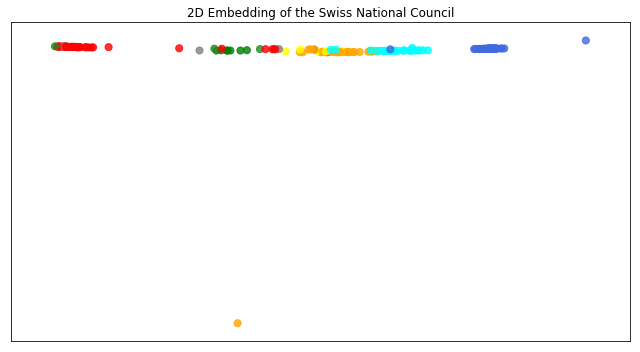

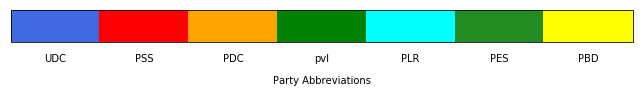

In [45]:
# Random embedding of the Swiss National Council
utils.plot_council_with_party_colors(council_df, 
                                     x_coords=x_coords, 
                                     y_coords=y_coords)
plt.show()

Preferably using the same plotting function as above, plot your embeddings by replacing the $x$ and $y$ coordinates by those obtained via your Laplacian eigenmaps. Are your embeddings more coherent with the party structure? Which of the two Laplacian matrices produces the best embedding in your opinion?

Note that UDC is a right-wing party, PSS is a left-wing party, and PDC, pvl and PLR are considered to be more centrist. Are those observations visible in the produced embeddings?

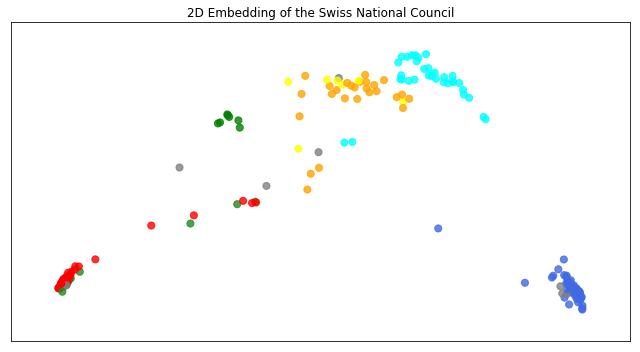

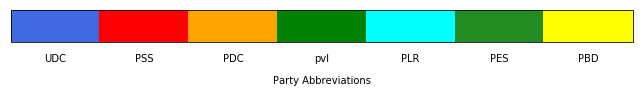

In [46]:
# Combinatorial Laplacian eigenmaps embedding of the Swiss National Council
# Random embedding of the Swiss National Council
utils.plot_council_with_party_colors(council_df, 
                                     x_coords=x_coords_norm, 
                                     y_coords=y_coords_norm)
plt.show()

In [ ]:
# Normalized Laplacian eigenmaps embedding of the Swiss National Council


## 3.3 Spectral clustering

In this section we will pretent not to have the party affiliation of each member and try to retrieve them (or some correlated signal) via spectral clustering of the members' graph.

As a refresher, spectral clustering consists in using the "lower" eigenvectors of the Laplacian matrix as feature vectors, which are then passed to a k-means algortithm that returns cluster assignments to each node. For what follows, you can restrict yourself to using only the **normalized** Laplacian eigenvectors.

For starters, perform spectral clustering on the dataset setting $k = 2$ clusters and $d=2$ eigenvectors. *Hint:* you can use the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) function from `scikit-learn`.  

In [176]:
def spectral_clustering(eigvecs_norm, k, d):
    Km = KMeans(n_clusters=k)
    cluster_assignments = Km.fit(eigvecs_norm[:,0:d])
    return cluster_assignments

In [177]:
cluster_assignments = spectral_clustering(eigvecs_norm, 2, 2)

Now plot the cluster assignments as a color signal on the Laplacian eigenmaps embedding, in a similar way as we have done before with the party color codes. You can use the same `utils.plot_council_with_party_colors` functions; it has an argument `custom_colors` to which you can pass the cluster assignment labels (the latter is accessible via `cluster_assignments.labels_` if you used `sklearn.cluster.KMeans`).

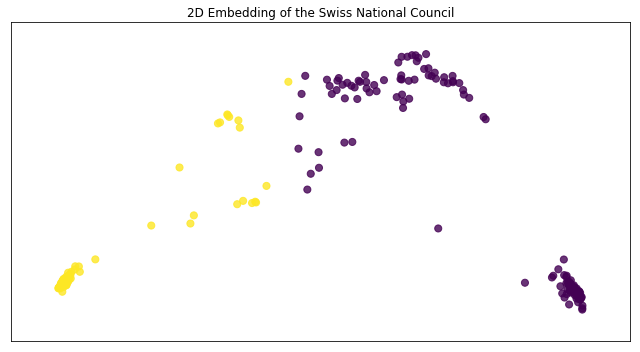

In [178]:
utils.plot_council_with_party_colors(council_df, 
                                     x_coords=x_coords_norm, 
                                     y_coords=y_coords_norm, 
                                     custom_colors=cluster_assignments.labels_
                                    )
plt.show()

Repeat this process a couple more times choosing other numbers of $k$ clusters and $d$ features and see if you can find some meaning in the retrieved cluster assignments by relating them to the party colors in the embeddings seen in Section 3.2.

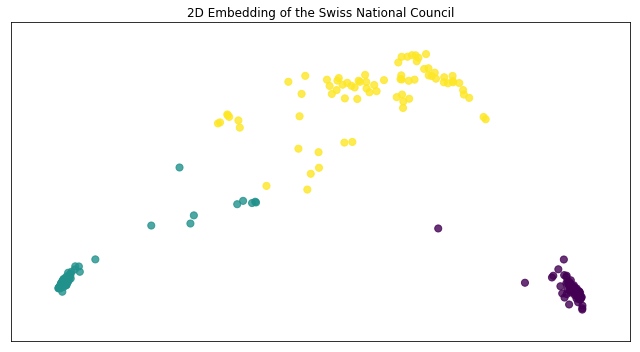

In [181]:
cluster_assignments = spectral_clustering(eigvecs_norm, 3, 3)
utils.plot_council_with_party_colors(council_df, 
                                     x_coords=x_coords_norm, 
                                     y_coords=y_coords_norm, 
                                     custom_colors=cluster_assignments.labels_
                                    )
plt.show()

Finally, set $k = 7$ and try to find the number of features $d$ that gets the spectral clustering assigment closest to the political party partition of Section 3.2.

In [192]:
cluster_assignments.labels_

array([0, 5, 5, 4, 5, 2, 5, 2, 5, 5, 2, 5, 5, 3, 5, 3, 5, 2, 5, 5, 0, 3,
       3, 5, 5, 2, 4, 5, 2, 5, 5, 5, 2, 5, 0, 5, 6, 5, 5, 2, 5, 5, 5, 5,
       5, 5, 3, 2, 5, 5, 2, 4, 5, 2, 5, 5, 5, 2, 0, 5, 6, 5, 5, 5, 5, 3,
       3, 5, 5, 5, 5, 5, 5, 5, 4, 5, 3, 3, 4, 5, 2, 5, 3, 2, 5, 4, 5, 0,
       3, 2, 4, 3, 6, 5, 5, 5, 6, 5, 5, 3, 3, 3, 5, 5, 2, 5, 5, 6, 3, 5,
       3, 5, 0, 2, 5, 2, 3, 5, 3, 5, 1, 2, 5, 5, 5, 1, 5, 5, 5, 5, 3, 2,
       2, 2, 5, 5, 5, 5, 3, 5, 0, 5, 2, 3, 2, 5, 5, 5, 2, 6, 5, 0, 5, 2,
       5, 2, 5, 3, 5, 5, 5, 5, 5, 3, 5, 5, 0, 5, 2, 5, 5, 5, 5, 2, 5, 5,
       5, 5, 5, 5, 2, 5, 5, 2, 2, 3, 1, 3, 5, 5, 5, 0, 1, 3, 1, 3, 1, 1,
       3, 1], dtype=int32)

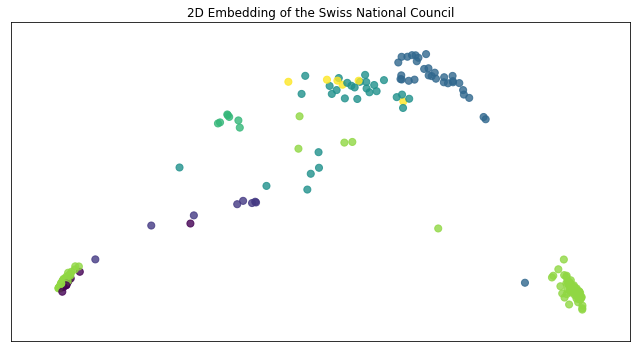

In [191]:
cluster_assignments = spectral_clustering(eigvecs_norm, k=7, d=18)
utils.plot_council_with_party_colors(council_df, 
                                     x_coords=x_coords_norm, 
                                     y_coords=y_coords_norm, 
                                     custom_colors=cluster_assignments.labels_
                                    )
plt.show()

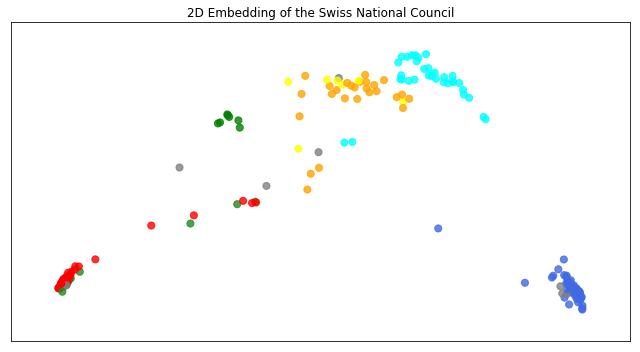

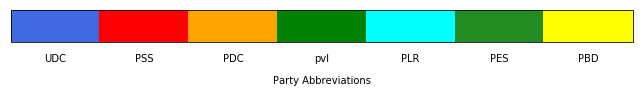

In [158]:
# Combinatorial Laplacian eigenmaps embedding of the Swiss National Council
# Random embedding of the Swiss National Council
utils.plot_council_with_party_colors(council_df, 
                                     x_coords=x_coords_norm, 
                                     y_coords=y_coords_norm)
plt.show()

In [250]:
D = 200
variance = np.zeros(D)
for d in np.arange(1,D):
    cluster_assignments = spectral_clustering(eigvecs_norm, k=7, d=d)
    variance[d] = np.var(np.histogram(cluster_assignments.labels_)[0]/200)


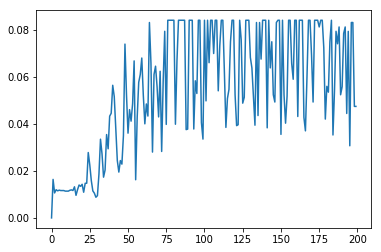

In [251]:
plt.plot(variance)

In [252]:
# when the number of features is higher variance is also higher